In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter

%matplotlib inline
init_notebook_mode(connected=True)

# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# import deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks

In [2]:
# read the data into a pandas dataframe
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
cols = ['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease']
for i in cols:
    print(i)
    print(data[i].value_counts())
    print('-'*100)

Sex
M    725
F    193
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
----------------------------------------------------------------------------------------------------
FastingBS
0    704
1    214
Name: FastingBS, dtype: int64
----------------------------------------------------------------------------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
----------------------------------------------------------------------------------------------------
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
----------------------------------------------------------------------------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
-------------------------------------------------------------------------

In [5]:
for i in data.columns:
    print(i, data[i].nunique())

Age 50
Sex 2
ChestPainType 4
RestingBP 67
Cholesterol 222
FastingBS 2
RestingECG 3
MaxHR 119
ExerciseAngina 2
Oldpeak 53
ST_Slope 3
HeartDisease 2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
fig = px.pie(data, names=['Positive', 'Negative'], values=data['HeartDisease'].value_counts(),
             hole=0.5, title='<b>Percentage of Positive and Negative', template='plotly', 
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_font_size=25)
fig.show()

In [9]:
counts0 = Counter(data[data['HeartDisease']==0]['Sex'])
counts1 = Counter(data[data['HeartDisease']==1]['Sex'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs Sex','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Sex",
    font=dict(size=18)
)

fig.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

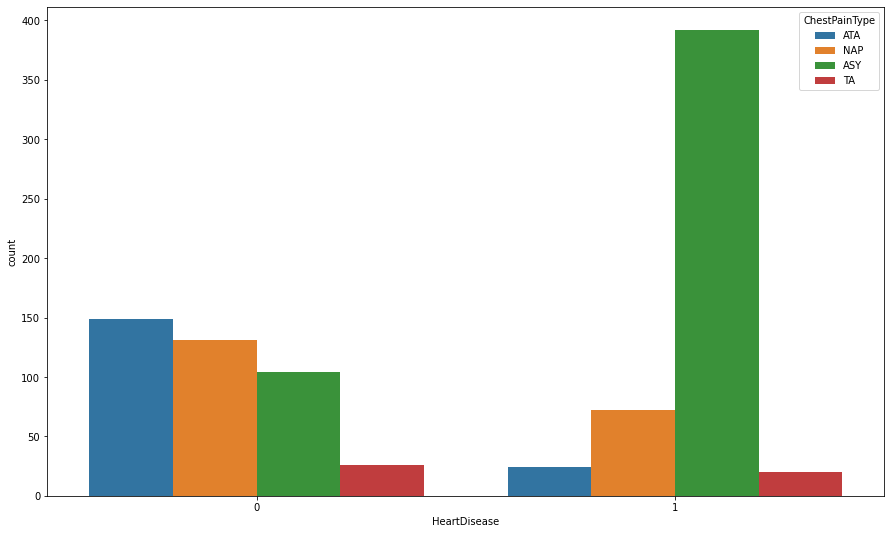

In [10]:
plt.figure(figsize=(15,9))
sns.countplot(data['HeartDisease'],hue=data['ChestPainType'])

In [11]:
counts0 = Counter(data[data['HeartDisease']==0]['FastingBS'])
counts1 = Counter(data[data['HeartDisease']==1]['FastingBS'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF97FF']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs FastingBS','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="FastingBS",
    font=dict(size=18)
)

fig.show()

Text(0, 0.5, 'Count')

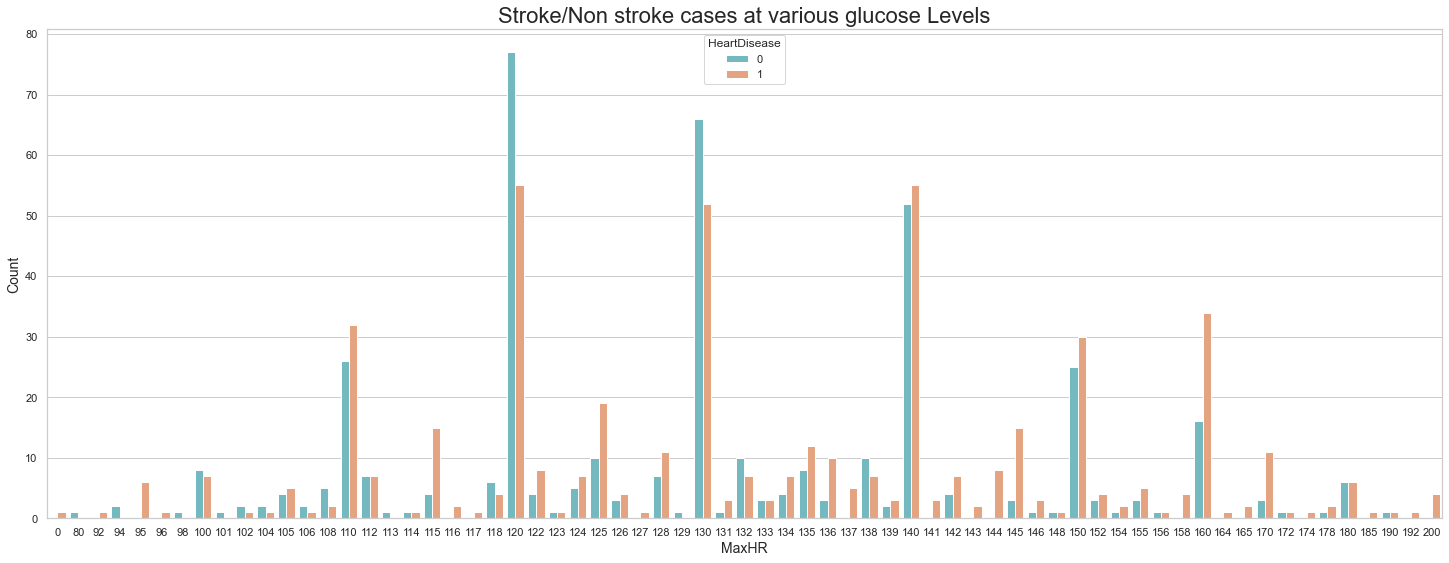

In [12]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='RestingBP',hue='HeartDisease',palette=['#66C4CC',"#F59F70"],data=data)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('MaxHR',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

In [13]:
str_only = data[data['HeartDisease'] == 1]
no_str_only = data[data['HeartDisease'] == 0]

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pa

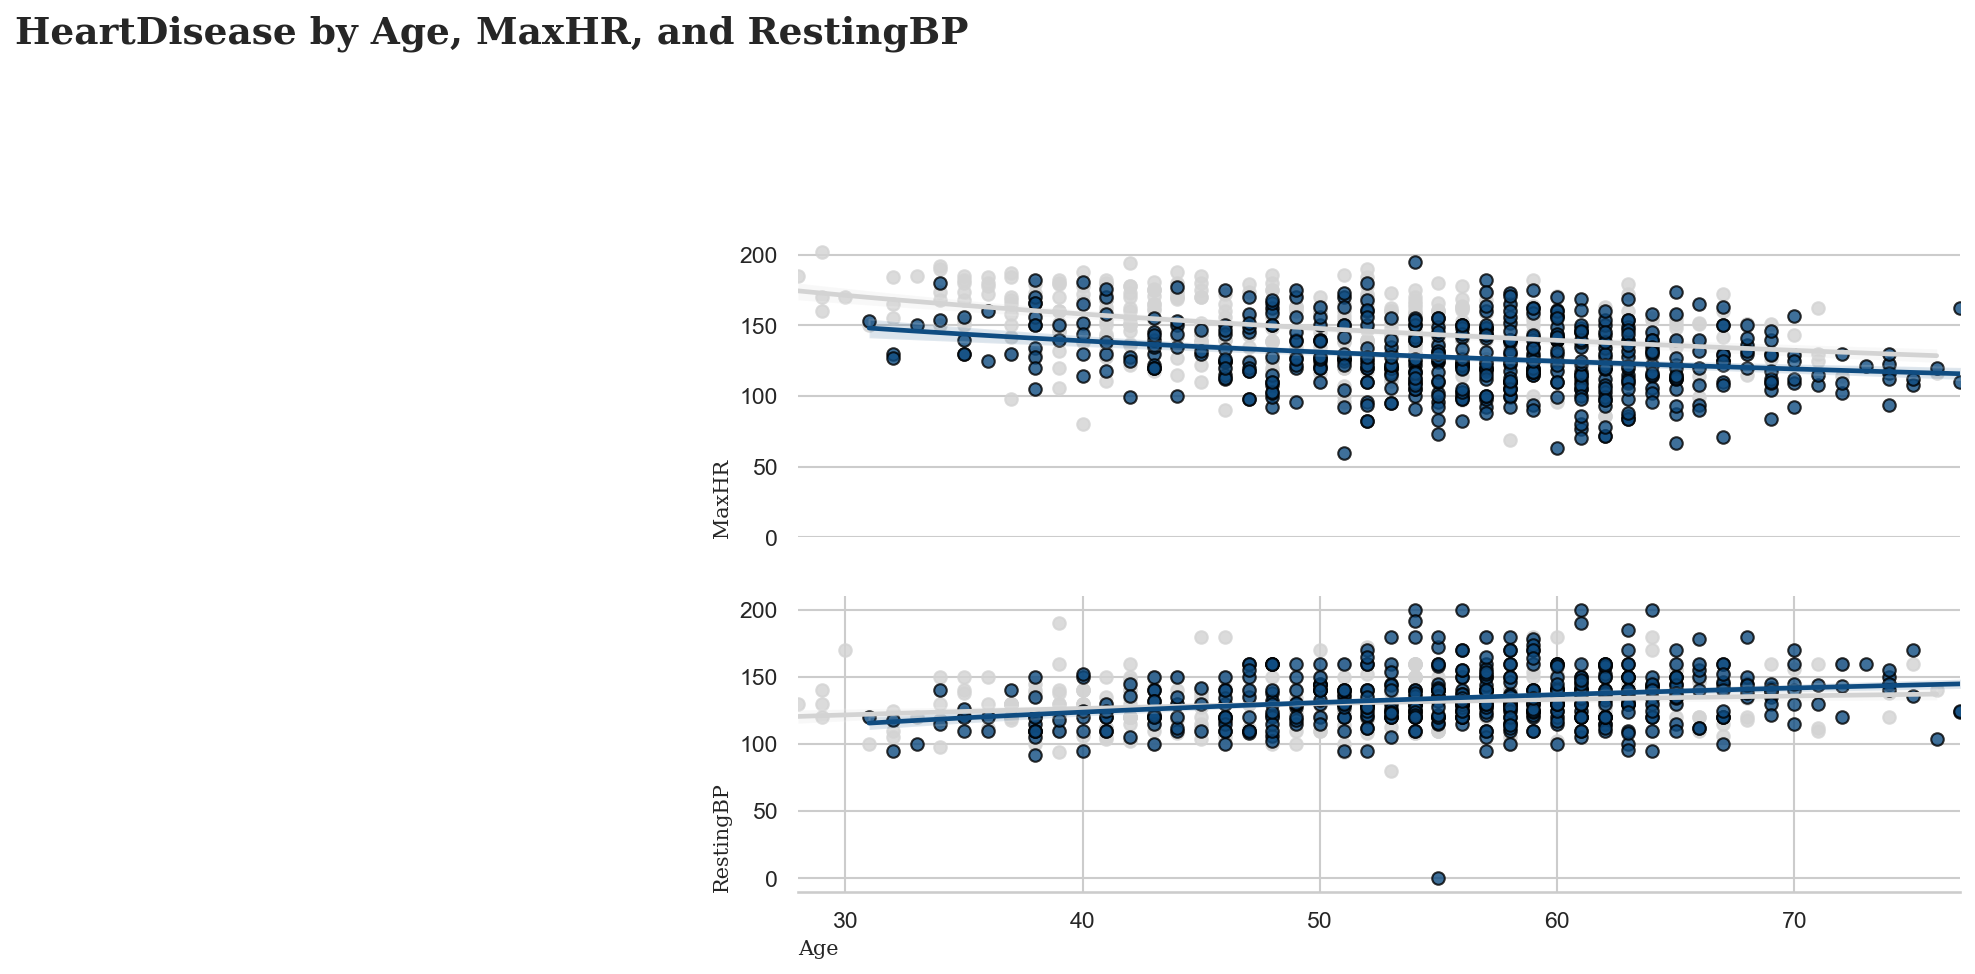

In [14]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,12),dpi=150,facecolor='white') 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor("white")
ax1.set_facecolor('white')

# glucose

sns.regplot(no_str_only['Age'],y=no_str_only['MaxHR'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['Age'],y=str_only['MaxHR'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("MaxHR",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)
# bmi
sns.regplot(no_str_only['Age'],y=no_str_only['RestingBP'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['Age'],y=str_only['RestingBP'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("RestingBP",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'HeartDisease by Age, MaxHR, and RestingBP',fontsize=18,fontfamily='serif',fontweight='bold')
# ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


# ax0.tick_params(axis=u'both', which=u'both',length=0)
# ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

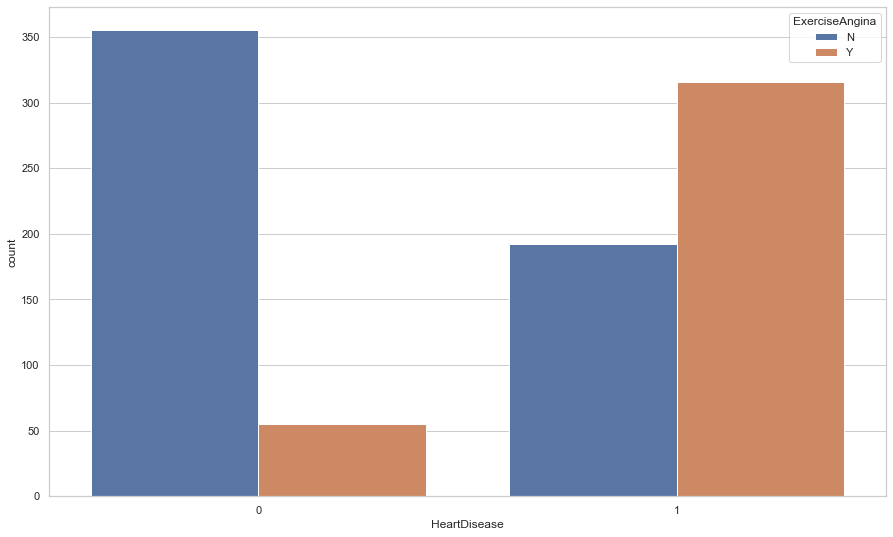

In [15]:
plt.figure(figsize=(15,9))
sns.countplot(data['HeartDisease'],hue=data['ExerciseAngina'])

In [16]:
counts0 = Counter(data[data['HeartDisease']==0]['RestingECG'])
counts1 = Counter(data[data['HeartDisease']==1]['RestingECG'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF97FF']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs RestingECG','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="RestingECG",
    font=dict(size=18)
)

fig.show()

In [17]:
data.Cholesterol.value_counts()


0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [18]:
data['Cholesterol'] = data['Cholesterol'].replace([0],np.nan)
df2=data.copy()
df2.Cholesterol.value_counts()

254.0    11
220.0    10
223.0    10
211.0     9
216.0     9
         ..
319.0     1
349.0     1
316.0     1
518.0     1
336.0     1
Name: Cholesterol, Length: 221, dtype: int64

<Figure size 1080x720 with 0 Axes>

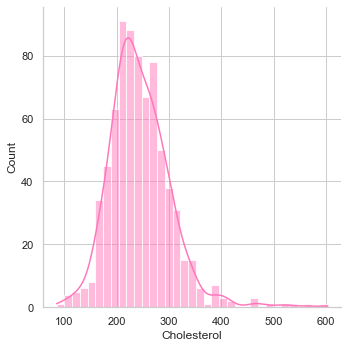

In [19]:
#The distribution of the data of the column
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "Cholesterol", kde = True,color='#ff77bb')

In [20]:
df2.isnull().sum()


Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [21]:
#filling the missings randomly
fill_list = data["Cholesterol"].dropna()
df2 = data["Cholesterol"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [22]:
df2.value_counts()

223.0    13
254.0    12
213.0    12
220.0    11
204.0    11
         ..
176.0     1
349.0     1
142.0     1
316.0     1
336.0     1
Name: Cholesterol, Length: 221, dtype: int64

In [23]:
df2.isnull().sum()

0

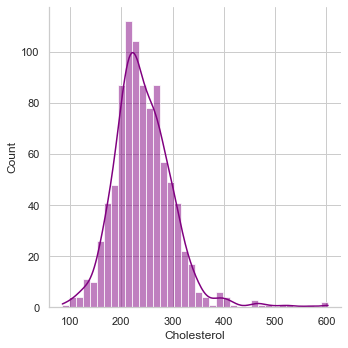

In [24]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [25]:
df3 = data["Cholesterol"].fillna(data["Cholesterol"].mean())
df3

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

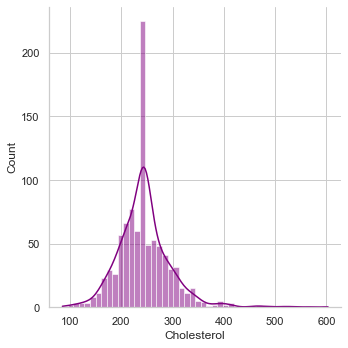

In [26]:
#checking the distribution after filling the missing values with the mean
sns.displot(df3, kde = True, color = "Purple")

In [27]:
data["Cholesterol"] = df2
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [28]:
data.Cholesterol.value_counts()

223.0    13
254.0    12
213.0    12
220.0    11
204.0    11
         ..
176.0     1
349.0     1
142.0     1
316.0     1
336.0     1
Name: Cholesterol, Length: 221, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

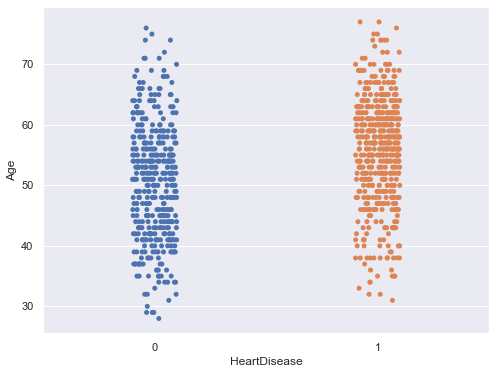

In [29]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Age", x ="HeartDisease", data = data)

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

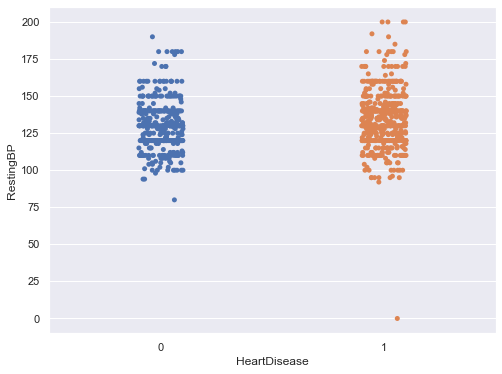

In [30]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data)

In [31]:
#Handling the outliers in this column
data = data.loc[(data["RestingBP"]>80)]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

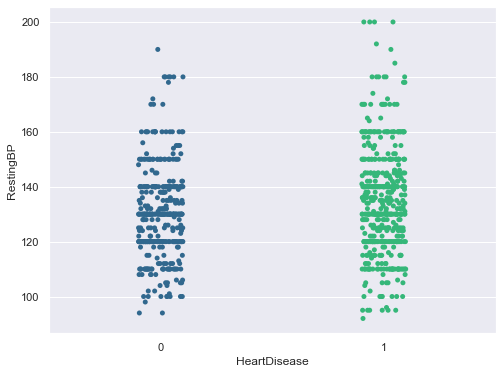

In [32]:
#re-checking for the outliers
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data, palette='viridis')

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

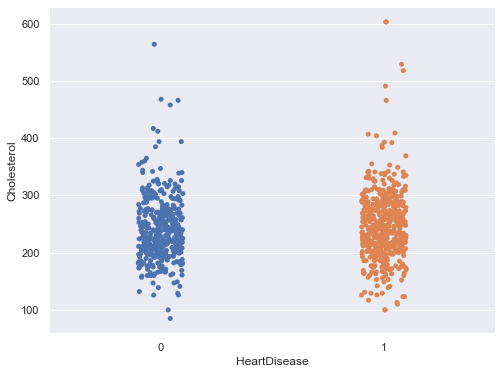

In [33]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Cholesterol", x ="HeartDisease", data = data)

In [34]:
#Handling the outliers in this column
data = data.loc[(data["Cholesterol"]<450)]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

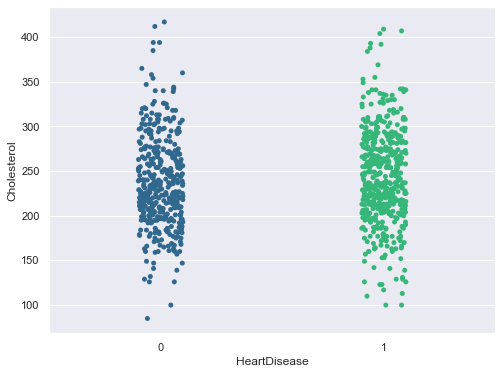

In [35]:
#re-checking for the outliers
sns.stripplot(y="Cholesterol", x ="HeartDisease", data = data, palette='viridis')

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

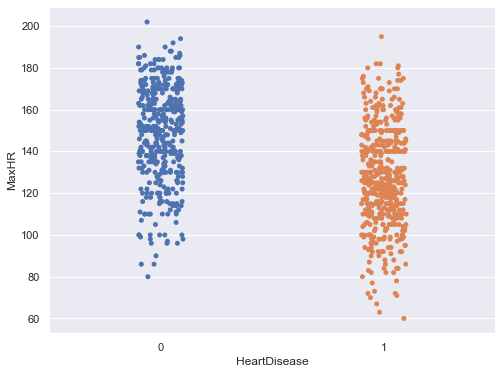

In [36]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="MaxHR", x ="HeartDisease", data = data)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             906 non-null    int64  
 1   Sex             906 non-null    object 
 2   ChestPainType   906 non-null    object 
 3   RestingBP       906 non-null    int64  
 4   Cholesterol     906 non-null    float64
 5   FastingBS       906 non-null    int64  
 6   RestingECG      906 non-null    object 
 7   MaxHR           906 non-null    int64  
 8   ExerciseAngina  906 non-null    object 
 9   Oldpeak         906 non-null    float64
 10  ST_Slope        906 non-null    object 
 11  HeartDisease    906 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 124.3+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["Sex"] = gender_le.fit_transform(data["Sex"])

In [39]:
data.Sex.value_counts()

1    715
0    191
Name: Sex, dtype: int64

In [40]:
ChestPainType_le = LabelEncoder()
data["ChestPainType"] = ChestPainType_le.fit_transform(data["ChestPainType"])

In [41]:
data.ChestPainType.value_counts()

0    488
2    200
1    172
3     46
Name: ChestPainType, dtype: int64

In [42]:
RestingECG_le = LabelEncoder()
data["RestingECG"] = RestingECG_le.fit_transform(data["RestingECG"])

In [43]:
data.RestingECG.value_counts()

1    541
0    187
2    178
Name: RestingECG, dtype: int64

In [44]:
ExerciseAngina_le = LabelEncoder()
data["ExerciseAngina"] = ExerciseAngina_le.fit_transform(data["ExerciseAngina"])

In [45]:
data.ExerciseAngina.value_counts()

0    539
1    367
Name: ExerciseAngina, dtype: int64

In [46]:
ST_Slope_le = LabelEncoder()
data["ST_Slope"] = ST_Slope_le.fit_transform(data["ST_Slope"])

In [47]:
data.ST_Slope.value_counts()

1    453
2    392
0     61
Name: ST_Slope, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             906 non-null    int64  
 1   Sex             906 non-null    int32  
 2   ChestPainType   906 non-null    int32  
 3   RestingBP       906 non-null    int64  
 4   Cholesterol     906 non-null    float64
 5   FastingBS       906 non-null    int64  
 6   RestingECG      906 non-null    int32  
 7   MaxHR           906 non-null    int64  
 8   ExerciseAngina  906 non-null    int32  
 9   Oldpeak         906 non-null    float64
 10  ST_Slope        906 non-null    int32  
 11  HeartDisease    906 non-null    int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 106.6 KB


<AxesSubplot:>

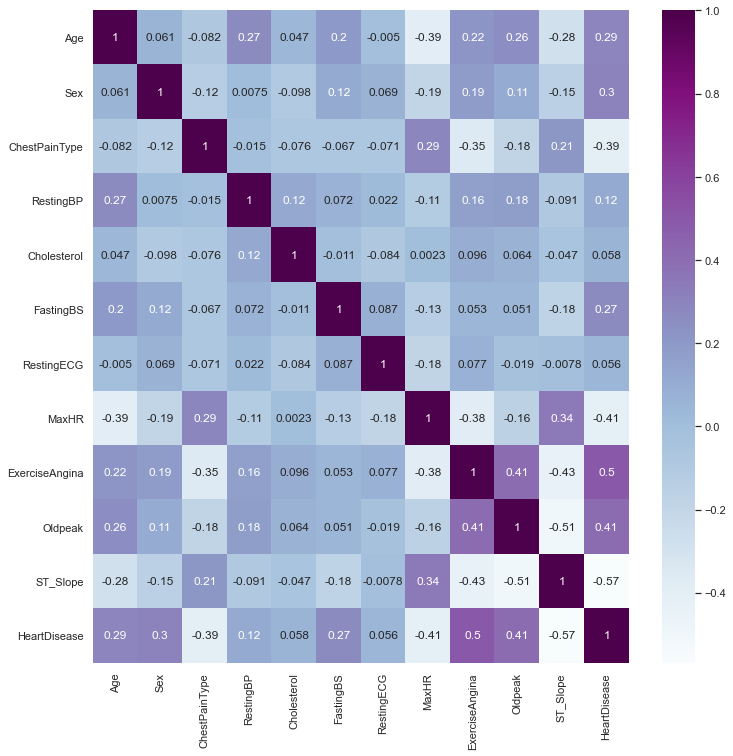

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

In [50]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [51]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif

In [52]:
X=data.drop('HeartDisease',axis=1).values
y=data['HeartDisease'].values

In [53]:
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [54]:
X.shape

(906, 11)

In [55]:
y.shape

(906,)

In [56]:
FeatureSelection=SelectPercentile(score_func=f_classif,percentile=80)
X_Sel=FeatureSelection.fit_transform(X,y)

In [57]:
X_Sel.shape

(906, 8)

In [58]:
FeatureSelection.get_support()

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True,  True])

In [59]:
X_Sel

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [60]:
from sklearn.preprocessing import StandardScaler
scalr=StandardScaler(copy=True,with_mean=True,with_std=True)
X=scalr.fit_transform(X_Sel)

In [61]:
X

array([[-1.43453311,  0.51684898,  0.22607788, ..., -0.82516092,
        -0.82929107,  1.04830531],
       [-0.47950511, -1.93480115,  1.27111132, ..., -0.82516092,
         0.10520857, -0.60345923],
       [-1.75287578,  0.51684898,  0.22607788, ..., -0.82516092,
        -0.82929107,  1.04830531],
       ...,
       [ 0.36940867,  0.51684898, -0.81895557, ...,  1.21188483,
         0.2921085 , -0.60345923],
       [ 0.36940867, -1.93480115,  0.22607788, ..., -0.82516092,
        -0.82929107, -0.60345923],
       [-1.64676155,  0.51684898,  1.27111132, ..., -0.82516092,
        -0.82929107,  1.04830531]])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_Sel.shape

(906, 8)

In [64]:
y.shape

(906,)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train),LR.score(X_test,y_test)

(0.8586156111929307, 0.8281938325991189)

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(X_train,y_train)
DT.score(X_train,y_train), DT.score(X_test,y_test)

(0.8865979381443299, 0.7841409691629956)

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=5,max_features=8,n_jobs=6)
RF.fit(X_train,y_train)
RF.score(X_train,y_train), RF.score(X_test,y_test)

(0.9263622974963182, 0.8325991189427313)

In [69]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier_model = svm.SVC(kernel='linear')
classifier_model.fit(X_train,y_train)
classifier_model.score(X_train,y_train), classifier_model.score(X_test,y_test)

(0.865979381443299, 0.8325991189427313)

# Neural network

In [70]:
model=Sequential()

In [79]:
model.add(Dense(16, activation='swish')) # First hidden layer
model.add(Dropout(0.25))
model.add(Dense(16, activation='swish')) # Second hidden layer
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)

In [81]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), 
                    batch_size = 32, epochs = 500, callbacks =[earlystopping])

Epoch 1/500
22/22 [==============================] - 0s 10ms/step - loss: 0.7017 - accuracy: 0.4197 - val_loss: 0.6789 - val_accuracy: 0.5947
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.5007 - val_loss: 0.6460 - val_accuracy: 0.5947
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.5361 - val_loss: 0.6153 - val_accuracy: 0.5947
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6289 - val_loss: 0.5843 - val_accuracy: 0.8414
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.8041 - val_loss: 0.5551 - val_accuracy: 0.8634
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.8513 - val_loss: 0.5237 - val_accuracy: 0.8326
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.8704 - val_loss: 0.4909 - val_accuracy: 0.8238
Epoch 8/500


In [82]:
type(history)

tensorflow.python.keras.callbacks.History

In [83]:
history.params

{'verbose': 1, 'epochs': 500, 'steps': 22}

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
history.history['accuracy']

[0.4197348952293396,
 0.5007363557815552,
 0.5360824465751648,
 0.6288659572601318,
 0.8041236996650696,
 0.8512518405914307,
 0.8703976273536682,
 0.8703976273536682,
 0.861561119556427,
 0.8630338907241821,
 0.8630338907241821,
 0.8748158812522888,
 0.8645066022872925,
 0.8645066022872925,
 0.8630338907241821,
 0.8748158812522888,
 0.8777614235877991,
 0.8630338907241821,
 0.8674521446228027,
 0.8659793734550476,
 0.861561119556427,
 0.8659793734550476,
 0.8645066022872925,
 0.8718703985214233,
 0.8556700944900513,
 0.8571428656578064,
 0.8674521446228027,
 0.8821796774864197,
 0.8792341947555542,
 0.8689249157905579,
 0.8792341947555542,
 0.8718703985214233,
 0.8703976273536682,
 0.8807069063186646,
 0.8748158812522888,
 0.8659793734550476,
 0.8689249157905579,
 0.8703976273536682,
 0.8703976273536682,
 0.8718703985214233,
 0.876288652420044,
 0.8733431696891785,
 0.8659793734550476,
 0.8645066022872925,
 0.8718703985214233,
 0.8689249157905579,
 0.8792341947555542,
 0.8645066022872

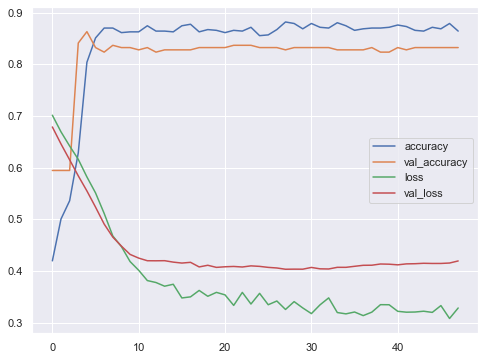

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()